In [1]:
%matplotlib inline

import numpy as np

import sys 
# sys.path.append('C:/Users/Milan Skocic/PycharmProjects/PyEIS/')
import pyeis

import matplotlib.pyplot as plt

from IPython.display import display, display_latex


In [2]:
print(pyeis.__version__)

0.5dev


# Simple circuit

In [7]:
circuit = 'Rel+Cdl/Rct+Dox'
Zs = pyeis.cdp.get_symbolic_immittance(circuit, immittance_type='Z')
display(Zs)

print(pyeis.cdp._get_parameters(Zs))

Zm = pyeis.cdp.get_numeric_immittance(Zs)

Dox*(I*Tdox*w)**(-Ndox)*tanh((I*Tdox*w)**Ndox) + Rel + 1.0/(1.0*I*Cdl*w + 1.0/Rct)

([Rct, Dox, Cdl, Tdox, Ndox, Rel], ['Rct', 'Dox', 'Cdl', 'Tdox', 'Ndox', 'Rel'])


<lambdifygenerated-2>:2: RuntimeWarning: overflow encountered in tanh
  return (p[1]*(1j*p[3]*w)**(-p[4])*tanh((1j*p[3]*w)**p[4]) + p[5] + 1.0/(1.0*1j*p[2]*w + 1.0/p[0]))


(20.55527484548747, -437.12470816187715)

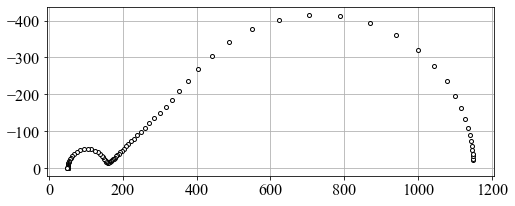

In [9]:
f = np.logspace(-3, 6, 100)
w = 2*np.pi*f
p = [100, 1000, 1e-6, 10, 0.5, 50]

ReZ= np.real(Zm(p, w))
ImZ = np.imag(Zm(p,w))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()

ax.set_aspect('equal')
ax.plot(ReZ, ImZ, 'ko', mfc='w')
ax.set_ylim(plt.gca().get_ylim()[::-1])